## Imports

In [11]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import time
from explore_hyperparameter import *
import pandas as pd
from plot_learning_curve import *
import time

import warnings
warnings.filterwarnings('ignore')


RANDOM_STATE = 4000 #to keep results consistent


## Load Data

In [4]:
data = pd.read_csv('letter-recognition.data')

### Separate X and y

In [5]:
X = data.values[:, 1:17]
y = data.values[:, 0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = RANDOM_STATE)



## Looping through hyperparameters

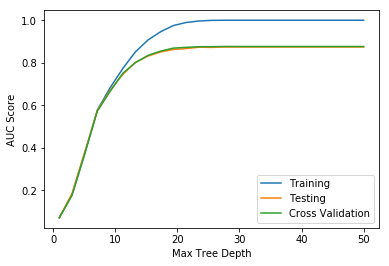

In [6]:
param = np.linspace(1, 50, 25, endpoint=True)
clf = [DecisionTreeClassifier(max_depth=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Max Tree Depth')

## min_samples_leaf


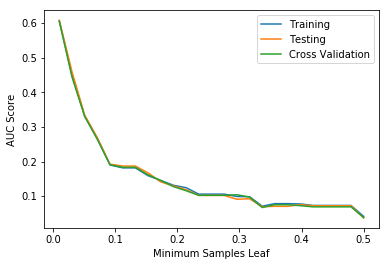

In [7]:
param = np.linspace(0.01, 0.5, 25, endpoint=True)
clf = [DecisionTreeClassifier(min_samples_leaf=i, random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Minimum Samples Leaf')

## min_samples_split

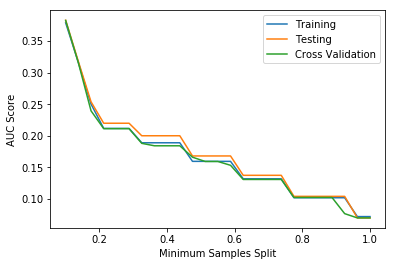

In [8]:
param = np.linspace(0.1, 1.0, 25, endpoint=True)
clf = [DecisionTreeClassifier(min_samples_split=i, random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Minimum Samples Split')

## Learning Curve

2.8658857345581055


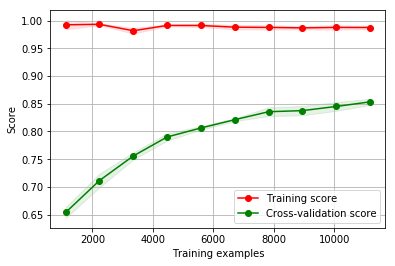

In [12]:
start = time.time()
clf = DecisionTreeClassifier(max_depth=20, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
plot_learning_curve(clf, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
print(time.time()-start)

19999
